In [21]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import spacy
nlp = spacy.load("en_core_web_lg")

from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

# Topic Modeling
#from gensim.models import CoherenceModel
#from gensim import corpora

#import pyLDAvis
#import pyLDAvis.gensim_models as gensimvis

# Fixing the dataset

In [175]:
# Save df
df = pd.read_csv('Data/combined_data.csv', encoding='latin1')
print(df.shape)
df.head()

(762, 12)


,region,location,activity,title,description,price,rating,review_count,duration,url,description_clean,activity_category
0,Luzon,Palawan,Day Trips,Underground River Day Trips from Puerto Prince...,Discover Puerto Princesa Subterranean River Na...,2820.81,4.5,104,6.0,https://www.tripadvisor.com.ph/AttractionProdu...,Discover Puerto Princesa Subterranean River Na...,Tours
1,Visayas,Cebu,Snorkeling,Whale Shark Encounter and Sumilon Sandbar with...,"An amazing experience. It was a very long day,...",8922.98,4.5,83,6.0,https://www.tripadvisor.com.ph/AttractionProdu...,amazing experience long day 330am pickup 2hr h...,Water Activities
2,Luzon,Metro Manila,Day Trips,Amazing Manila - Tagaytay Full Day Sightseeing...,Thanks again to the amazing staff Sean (Lead T...,7483.79,5.0,47,7.0,https://www.tripadvisor.com.ph/AttractionProdu...,Thanks amazing staff Sean Lead Tour Guide Dan ...,Tours
3,Luzon,Palawan,Ziplining,"3-in-1 Adventure: Underground River, Zipline r...",Get the most out of your trip to the world-fam...,4029.73,4.5,9,8.0,https://www.tripadvisor.com.ph/AttractionProdu...,Get trip worldfamous Underground River booking...,Outdoor Activities
4,Luzon,Palawan,Day Trips,El Nido Island Hopping Day Tour from Puerto Pr...,Enjoy an island hopping experience in El Nido ...,11455.96,5.0,1,18.0,https://www.tripadvisor.com.ph/AttractionProdu...,Enjoy island hopping experience El Nido even h...,Tours


In [176]:
# Lowercase activity column
df['activity'] = df['activity'].str.lower()
df.head()

,region,location,activity,title,description,price,rating,review_count,duration,url,description_clean,activity_category
0,Luzon,Palawan,day trips,Underground River Day Trips from Puerto Prince...,Discover Puerto Princesa Subterranean River Na...,2820.81,4.5,104,6.0,https://www.tripadvisor.com.ph/AttractionProdu...,Discover Puerto Princesa Subterranean River Na...,Tours
1,Visayas,Cebu,snorkeling,Whale Shark Encounter and Sumilon Sandbar with...,"An amazing experience. It was a very long day,...",8922.98,4.5,83,6.0,https://www.tripadvisor.com.ph/AttractionProdu...,amazing experience long day 330am pickup 2hr h...,Water Activities
2,Luzon,Metro Manila,day trips,Amazing Manila - Tagaytay Full Day Sightseeing...,Thanks again to the amazing staff Sean (Lead T...,7483.79,5.0,47,7.0,https://www.tripadvisor.com.ph/AttractionProdu...,Thanks amazing staff Sean Lead Tour Guide Dan ...,Tours
3,Luzon,Palawan,ziplining,"3-in-1 Adventure: Underground River, Zipline r...",Get the most out of your trip to the world-fam...,4029.73,4.5,9,8.0,https://www.tripadvisor.com.ph/AttractionProdu...,Get trip worldfamous Underground River booking...,Outdoor Activities
4,Luzon,Palawan,day trips,El Nido Island Hopping Day Tour from Puerto Pr...,Enjoy an island hopping experience in El Nido ...,11455.96,5.0,1,18.0,https://www.tripadvisor.com.ph/AttractionProdu...,Enjoy island hopping experience El Nido even h...,Tours


In [177]:
# Converting values in Descrption into a string (float identified during analysis)
df['description_clean'] = df['description_clean'].astype(str)

In [208]:
# Converting values
df['rating'] = df['rating'].astype(float)

In [209]:
df_min = df[df['region'] == 'Mindanao']
print(df_min.shape)
df_min.head(22)

(22, 12)


,region,location,activity,title,description,price,rating,review_count,duration,url,description_clean,activity_category
41,Mindanao,Surigao del Norte,day trips,"3 Islands, Secret beach and Coral Garden Full-...","Naked island Siargao, Guyam island and Daku is...",3166.22,4.5,8,6.0,https://www.tripadvisor.com.ph/AttractionProdu...,Naked island Siargao Guyam island Daku island ...,Tours
95,Mindanao,Surigao del Norte,boat charters,Sugba Lagoon Tour and Magpupungko Rock Pools,We'll pick you from where you're staying in th...,3454.06,1.0,1,6.0,https://www.tripadvisor.com.ph/AttractionProdu...,Well pick youre staying General Luna Siargao t...,Water Activities
120,Mindanao,Surigao del Norte,day trips,Jellyfish sanctuary and Sohoton cove Full-Day ...,"In order to grab the best possible experience,...",4893.25,2.0,1,6.0,https://www.tripadvisor.com.ph/AttractionProdu...,order grab best possible experience pick early...,Tours
140,Mindanao,Camiguin,multi-day tours,Camiguin Island Tour 3Days and 2nights,"Nested in the northern Mindanao, Philippines, ...",18303.63,4.5,8,72.0,https://www.tripadvisor.com.ph/AttractionProdu...,Nested northern Mindanao Philippines pearshape...,Tours
315,Mindanao,Surigao del Norte,boat charters,Siargao Island Hopping,"Overall, this was a well-organized Private tou...",3338.92,4.5,2,4.0,https://www.tripadvisor.com.ph/AttractionProdu...,Overall wellorganized Private tour bit disappo...,Water Activities
338,Mindanao,Surigao del Norte,day trips,Siargao Sugba Lagoon + Kauhagan Island + Pamom...,Although this Private tour was well-organized ...,6850.55,3.5,4,6.0,https://www.tripadvisor.com.ph/AttractionProdu...,Although Private tour wellorganized places vis...,Tours
388,Mindanao,Surigao del Norte,surfing,Quality Surfing Lessons in Siargao Island,Highly recommend Ulap Siyam for anybody that w...,2590.54,5.0,7,1.0,https://www.tripadvisor.com.ph/AttractionProdu...,Highly recommend Ulap Siyam anybody wants get ...,Water Activities
402,Mindanao,Surigao del Norte,boat charters,Siargao Island Hopping & land Tour,The tri island tour is one of the best things ...,6159.74,4.5,4,8.0,https://www.tripadvisor.com.ph/AttractionProdu...,tri island tour one best things siargao Takes ...,Water Activities
503,Mindanao,Surigao del Norte,boat charters,Siargao 3 Island hopping + Corregidor Island,You will experience the crystal clear water su...,5346.02,4.5,8,7.0,https://www.tripadvisor.com.ph/AttractionProdu...,experience crystal clear water surrounding 3 i...,Water Activities
512,Mindanao,Surigao del Norte,boat charters,Siargao 3 Island hopping + Mam On Island,NaN,5001.12,4.5,8,7.0,https://www.tripadvisor.com.ph/AttractionProdu...,nan,Water Activities


In [210]:
df_rest = df[df['region'] != 'Mindanao']
print(df_rest.shape)
df_rest.head()

(740, 12)


,region,location,activity,title,description,price,rating,review_count,duration,url,description_clean,activity_category
0,Luzon,Palawan,day trips,Underground River Day Trips from Puerto Prince...,Discover Puerto Princesa Subterranean River Na...,2820.81,4.5,104,6.0,https://www.tripadvisor.com.ph/AttractionProdu...,Discover Puerto Princesa Subterranean River Na...,Tours
1,Visayas,Cebu,snorkeling,Whale Shark Encounter and Sumilon Sandbar with...,"An amazing experience. It was a very long day,...",8922.98,4.5,83,6.0,https://www.tripadvisor.com.ph/AttractionProdu...,amazing experience long day 330am pickup 2hr h...,Water Activities
2,Luzon,Metro Manila,day trips,Amazing Manila - Tagaytay Full Day Sightseeing...,Thanks again to the amazing staff Sean (Lead T...,7483.79,5.0,47,7.0,https://www.tripadvisor.com.ph/AttractionProdu...,Thanks amazing staff Sean Lead Tour Guide Dan ...,Tours
3,Luzon,Palawan,ziplining,"3-in-1 Adventure: Underground River, Zipline r...",Get the most out of your trip to the world-fam...,4029.73,4.5,9,8.0,https://www.tripadvisor.com.ph/AttractionProdu...,Get trip worldfamous Underground River booking...,Outdoor Activities
4,Luzon,Palawan,day trips,El Nido Island Hopping Day Tour from Puerto Pr...,Enjoy an island hopping experience in El Nido ...,11455.96,5.0,1,18.0,https://www.tripadvisor.com.ph/AttractionProdu...,Enjoy island hopping experience El Nido even h...,Tours


# EDA needed for recommender engine

## Activities

In [17]:
# Get most common activity categories

act_cat_df = df.value_counts('activity_category').reset_index()
act_cat_df

,activity_category,count
0,Tours,489
1,Water Activities,158
2,Outdoor Activities,105
3,Recreational,10


In [16]:
act_cat_df_min = df_min.value_counts('activity_category').reset_index()
act_cat_df_min

,activity_category,count
0,Tours,14
1,Water Activities,8


In [89]:
act_cat_com = pd.merge(act_cat_df, act_cat_df_min, on='activity_category', how='left')
act_cat_com.rename(columns={'count_x':'Philippines', 'count_y':'Mindanao'}, inplace=True)
act_cat_com

,activity_category,Philippines,Mindanao
0,Tours,489,14.0
1,Water Activities,158,8.0
2,Outdoor Activities,105,NaN
3,Recreational,10,NaN


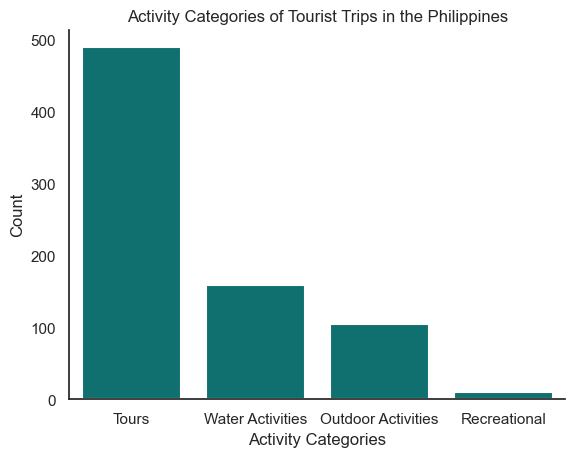

In [164]:
# Bar chart of activity categories in the Philippines

categories = act_cat_df['activity_category']
values = act_cat_df['count']

# Create the bar chart using seaborn
sns.barplot(x=categories, y=values, color='teal', linewidth=1.5)

# Apply seaborn style and customization
sns.set(style='ticks')
sns.despine()

# Add labels and title
plt.xlabel('Activity Categories')
plt.ylabel('Count')
plt.title('Activity Categories of Tourist Trips in the Philippines')

# Save plot
#plt.savefig('Plots/act_cat.png', transparent=True)

# Show the plot
plt.show()


In [90]:
# Reshape the data into long format
data = act_cat_com.melt('activity_category', var_name='Place')
data

,activity_category,Place,value
0,Tours,Philippines,489.0
1,Water Activities,Philippines,158.0
2,Outdoor Activities,Philippines,105.0
3,Recreational,Philippines,10.0
4,Tours,Mindanao,14.0
5,Water Activities,Mindanao,8.0
6,Outdoor Activities,Mindanao,NaN
7,Recreational,Mindanao,NaN


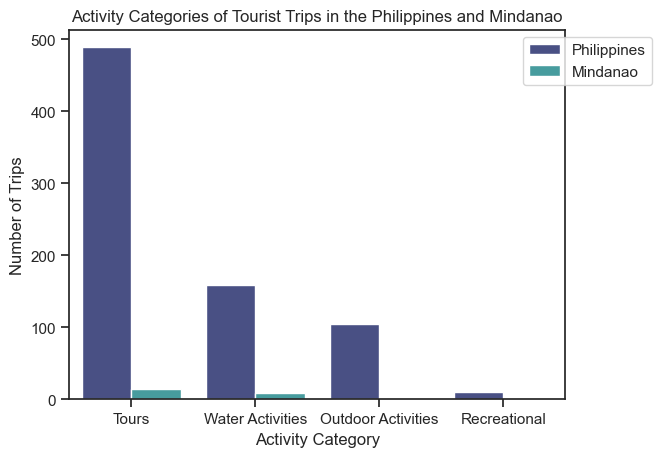

In [165]:
# Create the bar chart
sns.barplot(x='activity_category', y='value', hue='Place', palette='mako', data=data)

# Add labels and title
plt.xlabel('Activity Category')
plt.ylabel('Number of Trips')
plt.title('Activity Categories of Tourist Trips in the Philippines and Mindanao')
plt.legend(bbox_to_anchor=(0.9, 1))

# Save plot
#plt.savefig('Plots/act_cat_com.png', transparent=True)

# Display the chart
plt.show()

In [45]:
# Get most common activities

act_df = df.value_counts('activity').reset_index()
act_df

,activity,count
0,day trips,384
1,boat charters,104
2,boat tours,52
3,canyoneering,52
4,hiking,26
5,snorkeling,22
6,multi-day tours,19
7,atv,19
8,water sports,12
9,scuba diving,11


In [214]:
# Get top 10
act10_df = act_df.head(10)
act10_df['activity_category'] = ['Tours', 'Water Activities', 'Tours', 'Outdoor Activities', 'Outdoor Activities', 'Water Activities', 'Tours', 'Outdoor Activities', 'Water Activities', 'Water Activities']
act10_df

C:\Users\XIAOMI\AppData\Local\Temp\ipykernel_13768\1959493234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act10_df['activity_category'] = ['Tours', 'Water Activities', 'Tours', 'Outdoor Activities', 'Outdoor Activities', 'Water Activities', 'Tours', 'Outdoor Activities', 'Water Activities', 'Water Activities']


,activity,count,activity_category
0,day trips,384,Tours
1,boat charters,104,Water Activities
2,boat tours,52,Tours
3,canyoneering,52,Outdoor Activities
4,hiking,26,Outdoor Activities
5,snorkeling,22,Water Activities
6,multi-day tours,19,Tours
7,atv,19,Outdoor Activities
8,water sports,12,Water Activities
9,scuba diving,11,Water Activities


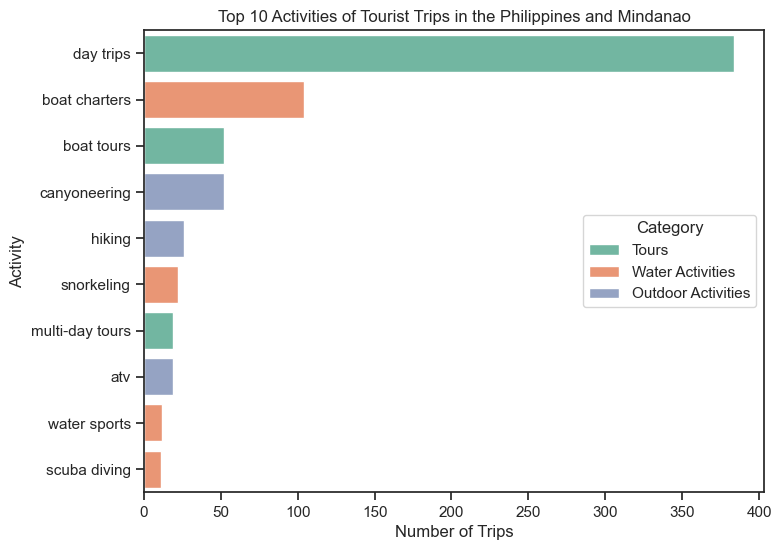

In [232]:
sns.set(style='ticks', palette='Set2')

# Adjust the figure size
plt.figure(figsize=(8, 6))

# Create the bar chart
sns.barplot(x='count', y='activity', hue='activity_category', data=act10_df, orient='h', linewidth=1, dodge=False)

# Add labels and title
plt.xlabel('Number of Trips')
plt.ylabel('Activity')
plt.title('Top 10 Activities of Tourist Trips in the Philippines and Mindanao')
plt.legend(title='Category')

# Save plot
#plt.savefig('Plots/act_cat_com.png', transparent=True)

# Display the chart
plt.show()

In [220]:
# Ratings of activities
df.groupby('activity_category')['rating'].mean().reset_index().sort_values('rating', ascending=False)

,activity_category,rating
0,Outdoor Activities,4.484762
3,Water Activities,4.481013
1,Recreational,4.420000
2,Tours,4.355010


In [221]:
# Ratings of activities
df.groupby('activity')['rating'].mean().reset_index().sort_values('rating', ascending=False)

,activity,rating
15,parasailing,5.000000
2,biking,4.875000
19,scuba diving,4.863636
14,paddleboarding,4.833333
21,surfing,4.750000
12,kayaking,4.700000
13,multi-day tours,4.657895
17,rock climbing,4.600000
16,photoshoot,4.600000
7,cooking classes,4.585714


In [50]:
# Get most common activities in Mindanao

act_df_min = df_min.value_counts('activity').reset_index()
act_df_min

,activity,count
0,day trips,13
1,boat charters,6
2,surfing,2
3,multi-day tours,1


In [168]:
# Create a wordcloud function

def gen_wc(col, title):
    #Concatenate the text from the column
    text = ' '.join(col)

    # Create a WordCloud object and generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

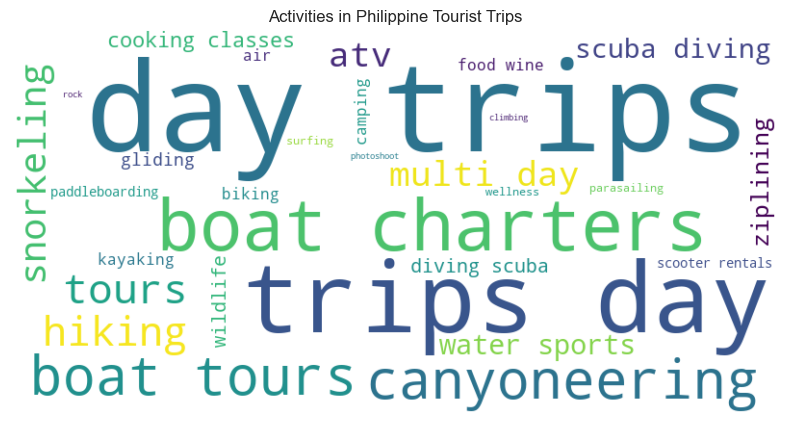

In [118]:
# Wordcloud for PH activities
gen_wc(df['activity'], 'Activities in Philippine Tourist Trips', custom_stopwords)

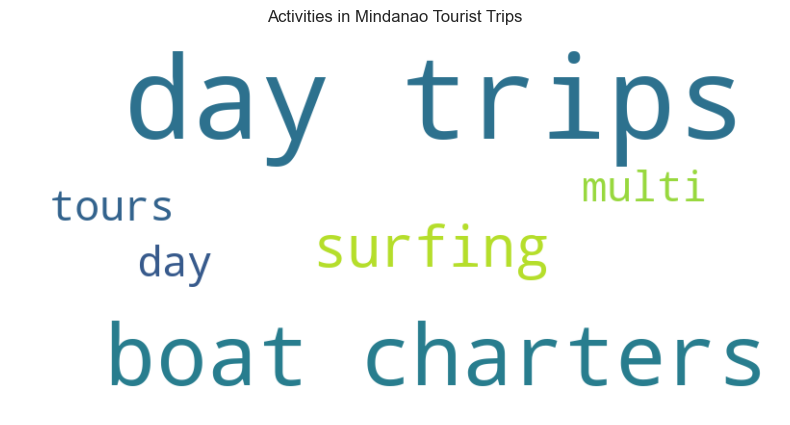

In [48]:
# Wordcloud for Mindanao activities
gen_wc(df_min['activity'], 'Activities in Mindanao Tourist Trips')

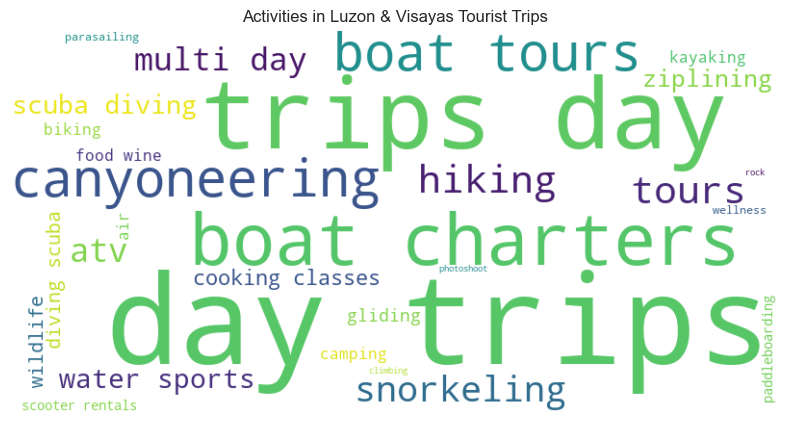

In [49]:
# Wordcloud for activities in rest of PH
gen_wc(df_rest['activity'], 'Activities in Luzon & Visayas Tourist Trips')

## Tourist Spots

In [61]:
# Get the top-rated tourist spots

df.groupby('location')['rating'].mean().reset_index().sort_values('rating', ascending=False)

,location,rating
33,Porac,5.000000
27,Mindoro,5.000000
5,Batanes,4.900000
1,Angeles,4.800000
38,Subic,4.800000
24,Luzon,4.705128
10,Boracay,4.705000
0,Aklan,4.700000
26,Metro Manila,4.664634
34,Rizal,4.600000


In [121]:
df.groupby('location')['rating'].mean().reset_index().sort_values('rating', ascending=False).head(13) # remove Luzon, Aklan, Calabarzon for top 10

,location,rating
33,Porac,5.000000
27,Mindoro,5.000000
5,Batanes,4.900000
1,Angeles,4.800000
38,Subic,4.800000
24,Luzon,4.705128
10,Boracay,4.705000
0,Aklan,4.700000
26,Metro Manila,4.664634
34,Rizal,4.600000


In [62]:
# Get the top-rated tourist spots in Mindanao

df_min.groupby('location')['rating'].mean().reset_index().sort_values('rating', ascending=False) # Siargao and Surigao del Norte should be combined

,location,rating
0,Camiguin,4.500000
1,Davao,4.500000
4,Zamboanga Peninsula,4.500000
2,Siargao,4.100000
3,Surigao del Norte,3.909091


In [205]:
df_min.value_counts('location')

location
Surigao del Norte      11
Davao                   4
Siargao                 4
Camiguin                2
Zamboanga Peninsula     1
Name: count, dtype: int64

In [211]:
df_min.groupby('location')['review_count'].sum() # Something wrong here

location
Camiguin                        88
Davao                     18313720
Siargao                  396229844
Surigao del Norte      81124748888
Zamboanga Peninsula              8
Name: review_count, dtype: object

# Other EDA

## Price

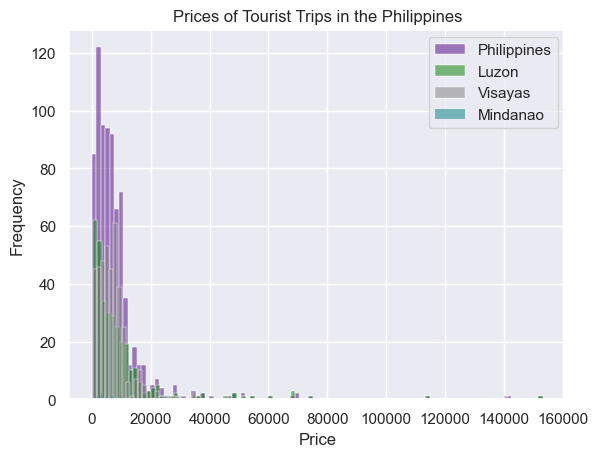

In [134]:
# Get data
data1 = df['price']
data2 = df_rest[df_rest['region'] == 'Luzon']['price']
data3 = df_rest[df_rest['region'] == 'Visayas']['price']
data4 = df_min['price']

# Plot the histograms
sns.histplot(data1, bins=100, alpha=0.5, label='Philippines', color='indigo')
sns.histplot(data2, bins=100, alpha=0.5, label='Luzon', color='green')
sns.histplot(data3, bins=100, alpha=0.5, label='Visayas', color='gray')
sns.histplot(data4, bins=100, alpha=0.5, label='Mindanao', color='teal')

# Add labels and legend
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Prices of Tourist Trips in the Philippines')
plt.legend()

# Save plot
#plt.savefig('Plots/act_cat_com.png', transparent=True)

# Show the plot
plt.show()

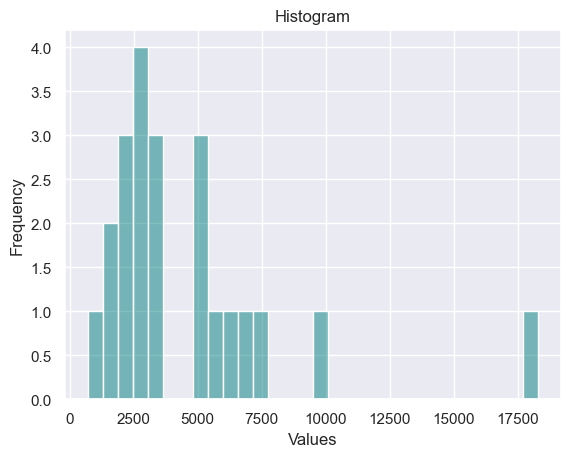

In [136]:
# Create a histogram for price in Mindanao

sns.histplot(df_min['price'], bins=30, alpha=0.5, color='teal')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

In [140]:
price_df = df.groupby('region')['price'].mean().reset_index()
price_df = price_df[1:]
price_df = price_df.reindex([1,3,2])
price_df

,region,price
1,Luzon,9462.483373
3,Visayas,7411.057408
2,Mindanao,4549.294091


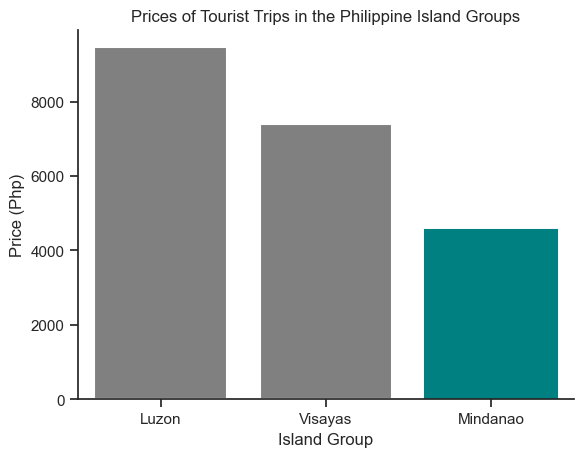

In [166]:
# Bar chart of prices in the Philippines
categories = price_df['region']
values = price_df['price']

# Create the bar chart using seaborn
ax = sns.barplot(x=categories, y=values, color='gray', linewidth=1.5)

# Set the color of the Mindanao bar
ax.patches[2].set_color('teal')

# Apply seaborn style and customization
sns.set(style='ticks')
sns.despine()
#sns.set_style("white")

# Add labels and title
plt.xlabel('Island Group')
plt.ylabel('Price (Php)')
plt.title('Prices of Tourist Trips in the Philippine Island Groups')

# Save plot
#plt.savefig('Plots/price_chart.png', transparent=True)

# Show the plot
plt.show()

## Duration

In [147]:
duration_df = df.groupby('region')['duration'].mean().reset_index()
duration_df = duration_df[1:]
duration_df = duration_df.reindex([1,3,2])
duration_df

,region,duration
1,Luzon,12.494235
3,Visayas,7.881197
2,Mindanao,14.545455


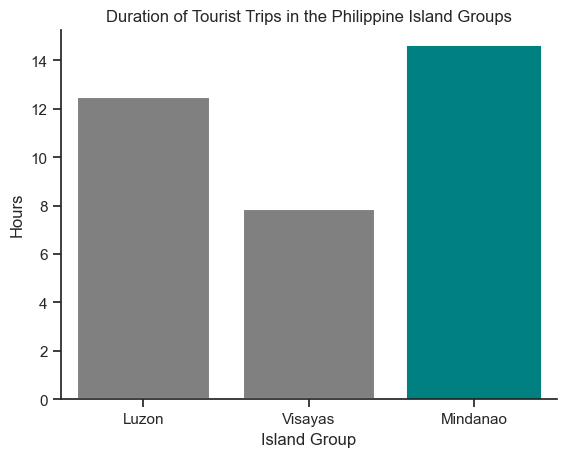

In [150]:
# Bar chart of duration in the Philippines
categories = duration_df['region']
values = duration_df['duration']

# Create the bar chart using seaborn
ax = sns.barplot(x=categories, y=values, color='gray', linewidth=1.5)

# Set the color of the Mindanao bar
ax.patches[2].set_color('teal')

# Apply seaborn style and customization
sns.set(style='ticks')
sns.despine()

# Add labels and title
plt.xlabel('Island Group')
plt.ylabel('Hours')
plt.title('Duration of Tourist Trips in the Philippine Island Groups')

# Save plot
#plt.savefig('Plots/duration_chart.png', transparent=True)

# Show the plot
plt.show()

## Ratings

In [182]:
ratings_df = df.groupby('region')['rating'].mean().reset_index()
ratings_df = ratings_df[1:]
ratings_df = ratings_df.reindex([1,3,2])
ratings_df

,region,rating
1,Luzon,4.451940
3,Visayas,4.379703
2,Mindanao,4.131818


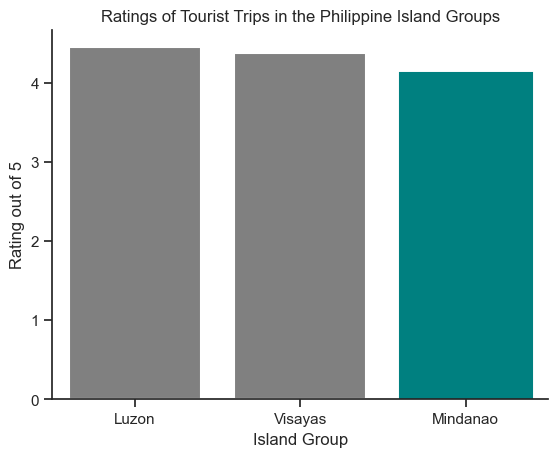

In [188]:
# Bar chart of ratings in the Philippines
categories = rating_df['region']
values = rating_df['rating']

# Create the bar chart using seaborn
ax = sns.barplot(x=categories, y=values, color='gray', linewidth=1.5)

# Set the color of the Mindanao bar
ax.patches[2].set_color('teal')

# Apply seaborn style and customization
sns.set(style='ticks')
sns.despine()

# Add labels and title
plt.xlabel('Island Group')
plt.ylabel('Rating out of 5')
plt.title('Ratings of Tourist Trips in the Philippine Island Groups')

# Save plot
#plt.savefig('Plots/price_chart.png', transparent=True)

# Show the plot
plt.show()

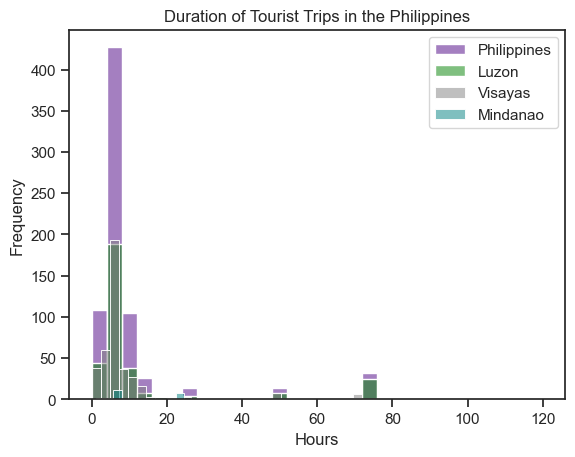

In [195]:
# Get data
data1 = df['duration']
data2 = df_rest[df_rest['region'] == 'Luzon']['duration']
data3 = df_rest[df_rest['region'] == 'Visayas']['duration']
data4 = df_min['duration']

# Plot the histograms
sns.histplot(data1, bins=30, alpha=0.5, label='Philippines', color='indigo')
sns.histplot(data2, bins=30, alpha=0.5, label='Luzon', color='green')
sns.histplot(data3, bins=30, alpha=0.5, label='Visayas', color='gray')
sns.histplot(data4, bins=30, alpha=0.5, label='Mindanao', color='teal')

# Add labels and legend
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Duration of Tourist Trips in the Philippines')
plt.legend()

# Save plot
#plt.savefig('Plots/duration_hist.png', transparent=True)

# Show the plot
plt.show()

## Descriptions

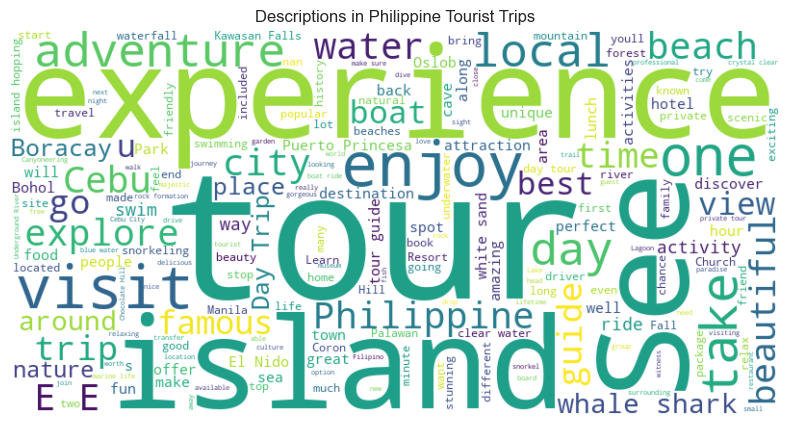

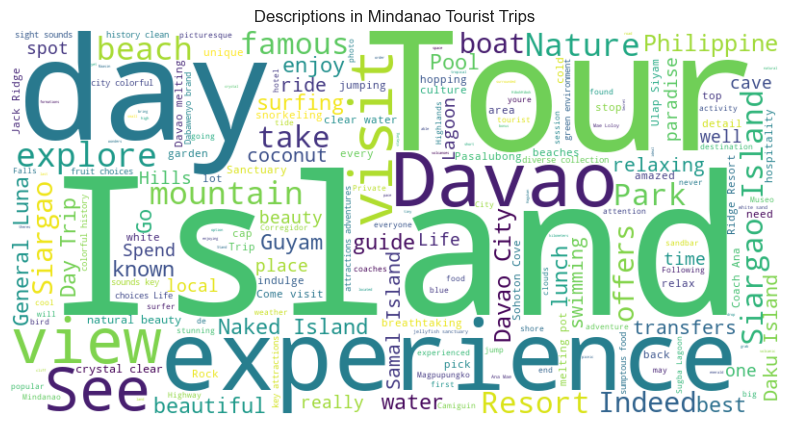

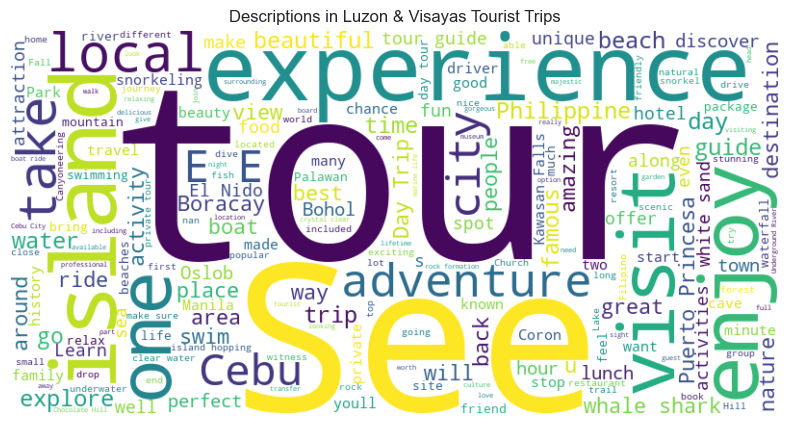

In [180]:
# Create wordlclouds for descriptions

gen_wc(df['description_clean'], 'Descriptions in Philippine Tourist Trips')
gen_wc(df_min['description_clean'], 'Descriptions in Mindanao Tourist Trips')
gen_wc(df_rest['description_clean'], 'Descriptions in Luzon & Visayas Tourist Trips')

## Titles

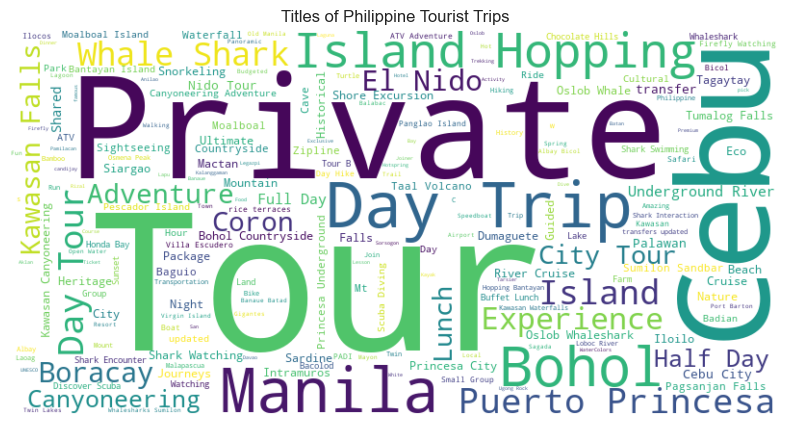

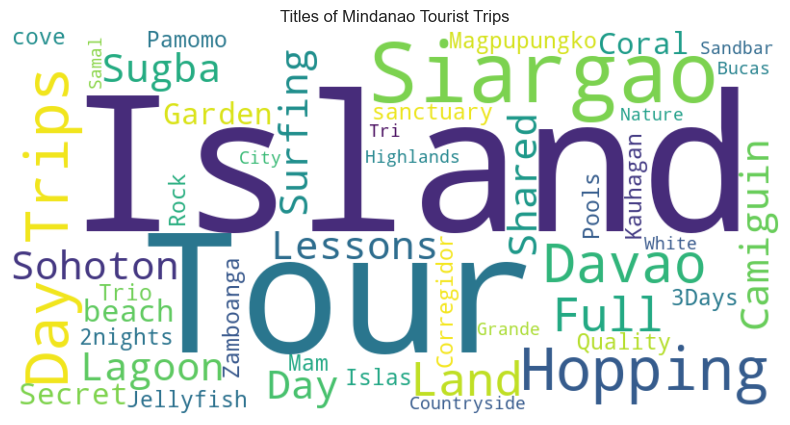

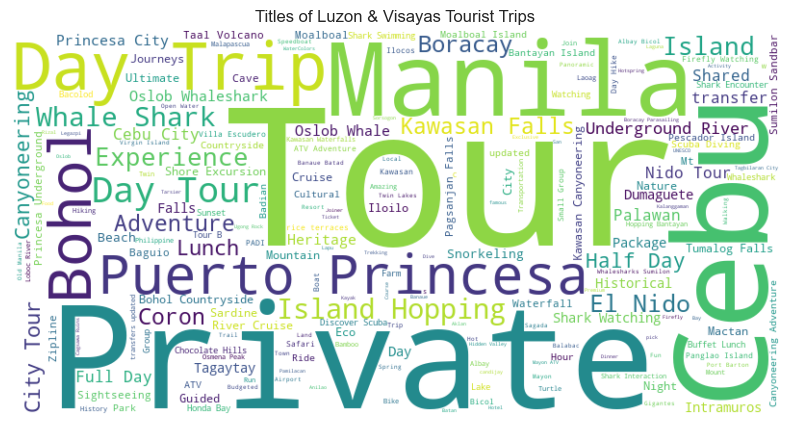

In [181]:
# Create wordlclouds for Titles

gen_wc(df['title'], 'Titles of Philippine Tourist Trips')
gen_wc(df_min['title'], 'Titles of Mindanao Tourist Trips')
gen_wc(df_rest['title'], 'Titles of Luzon & Visayas Tourist Trips')

## Location in PH

In [187]:
reg_df = df.value_counts('region').reset_index()
reg_df = reg_df[0:3]
reg_df = reg_df.reindex([1,0,2])
reg_df

,region,count
1,Luzon,335
0,Visayas,404
2,Mindanao,22


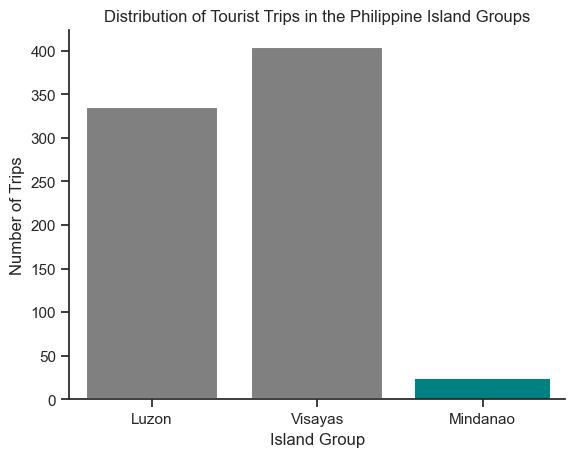

In [189]:
# Bar chart of region in the Philippines
categories = reg_df['region']
values = reg_df['count']

# Create the bar chart using seaborn
ax = sns.barplot(x=categories, y=values, color='gray', linewidth=1.5)

# Set the color of the Mindanao bar
ax.patches[2].set_color('teal')

# Apply seaborn style and customization
sns.set(style='ticks')
sns.despine()

# Add labels and title
plt.xlabel('Island Group')
plt.ylabel('Number of Trips')
plt.title('Distribution of Tourist Trips in the Philippine Island Groups')

# Save plot
#plt.savefig('Plots/reg_chart.png', transparent=True)

# Show the plot
plt.show()

## Correlation between price and ratings

In [190]:
df['price'].corr(df['rating'])

0.12875029840450225

In [191]:
df_min['price'].corr(df_min['rating'])

0.02975228089171231

## Number of reviews

In [213]:
df['review_count'].sum()

'10483479113546314189831225211856536172617109118468164118318411032418887834878188882411226302212122521318211111111111121821131432112111111813106888888221135111188888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888848888492810262723276101497021981031661218122353330586322132113162425332691028412461124438433823812182112318141282468111332128888811383892223776558513828184103221213111111118222141314111221111182222814111818983868845882311241161311428881351118111888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888886847983,9471,5172,4782,9641,7914573602071,602120481,6753692071716641,0912783491901471087039695143664502293452794443847241136385448512211029323843521718377132422894322372614425115193923133829651371719122634161712596324162716292326513712817119127226010000734000001604400173012048005200125596324162716106611000000000000000000000000000000'

In [212]:
df.groupby('location')['review_count'].mean().reset_index().sort_values('review_count', ascending=False)

TypeError: Could not convert 3,9471,5171,7911,6752781472791132928926251152313296517859 to numeric